# **CODSOFT VIRTUAL INTERNSHIP**

**TASK 4 :  SALES PREDCITION USING PYTHON**

> Author : Vaibhav Aswal

> Domain : Data Science

> Batch : SEPTEMBER BATCH A77




In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import pylab as p
import statsmodels.api as sm

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [9]:
#Linking Dataset to Colab
import io
df = pd.read_csv((io.BytesIO(uploaded["Advertising.csv"])), encoding ='unicode_escape')

In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
rows,columns = df.shape
print(f"The dataset has {rows} rows and {columns} columns")

The dataset has 200 rows and 4 columns


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
print("skewness")
print("TV")
print(round(skew(df.TV, axis=0, bias=True),4))
print("Radio")
print(round(skew(df.Radio, axis=0, bias=True),4))
print("Newspaper")
print(round(skew(df.Newspaper, axis=0, bias=True),4))
print("Sales")
print(round(skew(df.Sales, axis=0, bias=True),4))

skewness
TV
-0.0693
Radio
0.0935
Newspaper
0.888
Sales
-0.0732


In [16]:
print("Kurtosis")
print(round(kurtosis(df.TV, axis=0, bias=True),4))
print("Radio")
print(round(kurtosis(df.Radio, axis=0, bias=True),4))
print("Newspaper")
print(round(kurtosis(df.Newspaper, axis=0, bias=True),4))
print("Sales")
print(round(kurtosis(df.Sales, axis=0, bias=True),4))

Kurtosis
-1.2259
Radio
-1.259
Newspaper
0.6035
Sales
-0.654


In [17]:
df.isnull().sum()*100/df.shape[0]

,0
TV,0.0
Radio,0.0
Newspaper,0.0
Sales,0.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


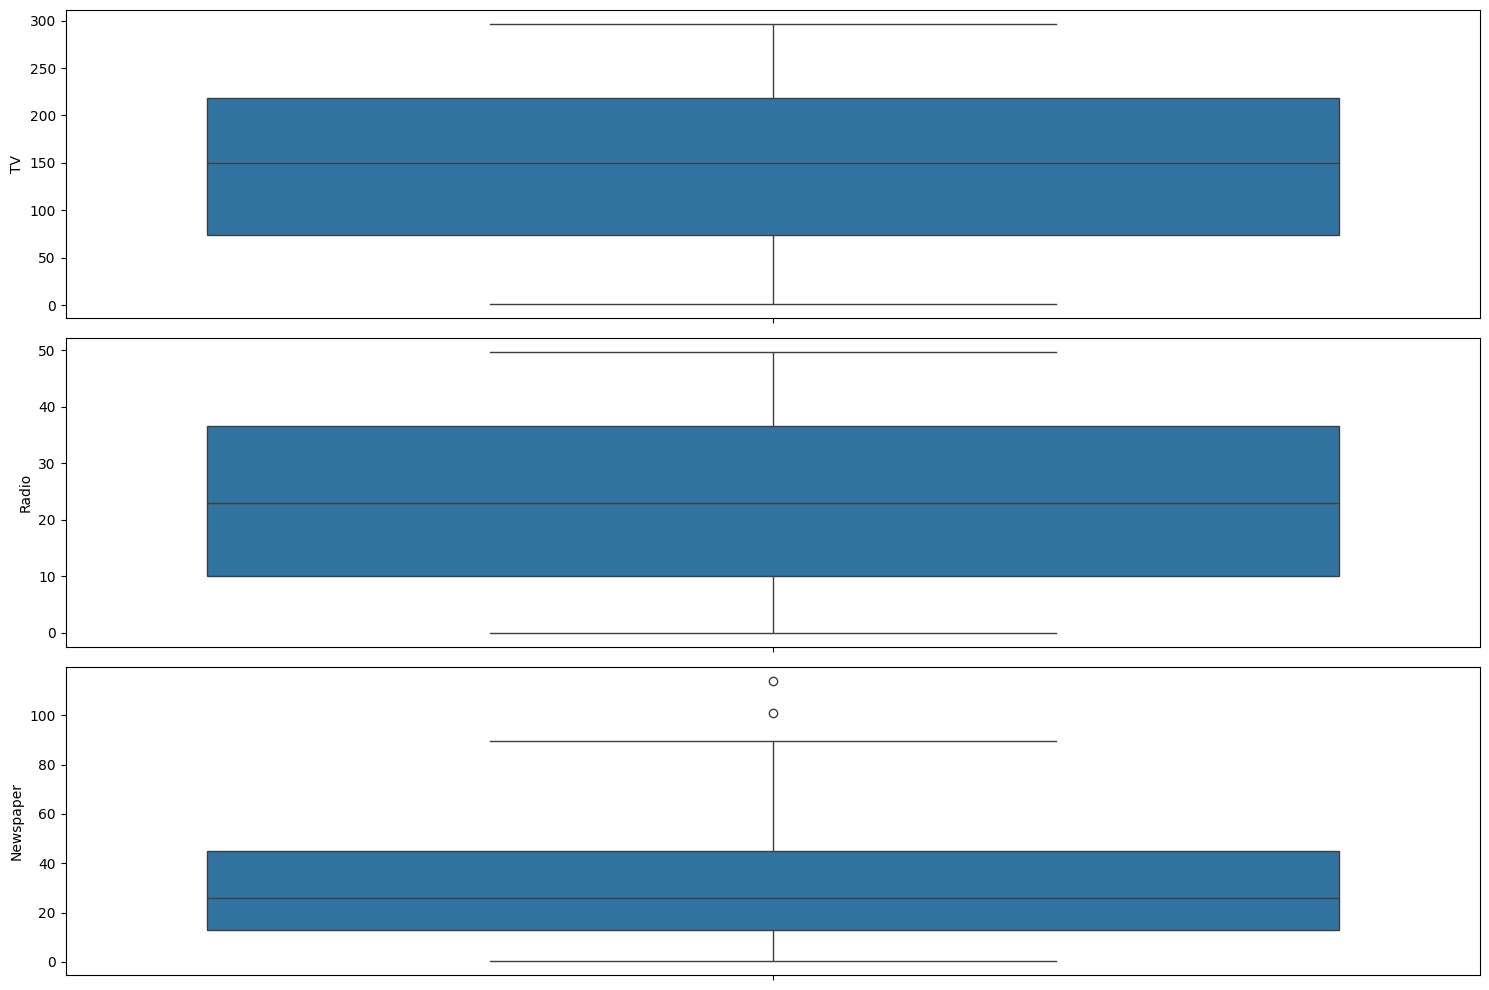

In [36]:
fig, axs = plt.subplots(3, figsize=(15,10))
plt1 = sns.boxplot(df['TV'], ax=axs[0])
plt2 = sns.boxplot(df['Radio'], ax=axs[1])
plt3 = sns.boxplot(df['Newspaper'], ax=axs[2])
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


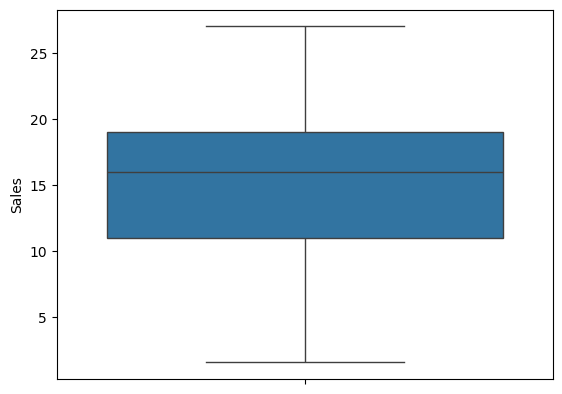

In [23]:
sns.boxplot(df['Sales'])
plt.show()

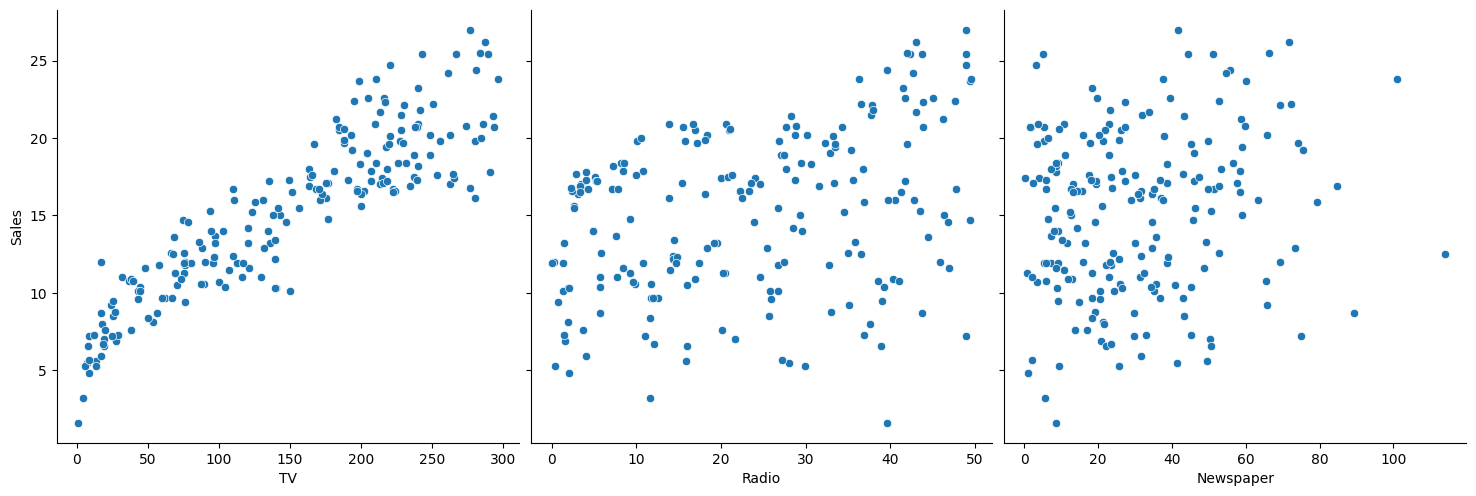

In [24]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=5,aspect=1,kind='scatter')
plt.show()

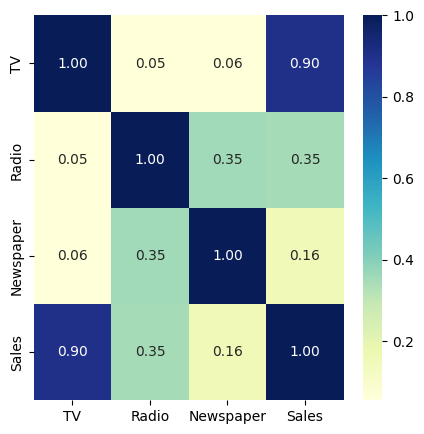

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True, fmt=".2f")
plt.show()

In [28]:
x=df['TV']
y=df['Sales']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [30]:
x_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [31]:
y_train.head()

,Sales
74,17.0
3,16.5
185,22.6
26,15.0
90,14.0


In [32]:
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()

In [33]:
lr.params

,0
const,6.948683
TV,0.054546


In [34]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.52e-52
Time:                        05:35:15   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

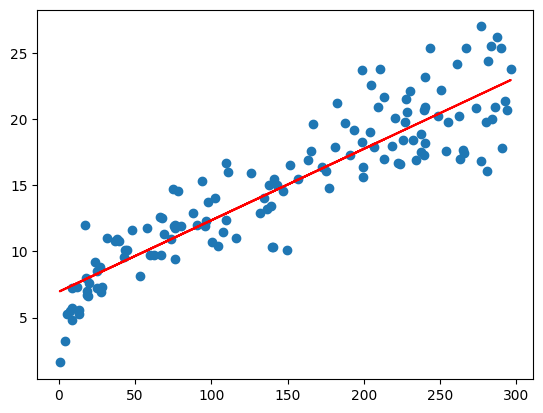

In [35]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()